# Chapter 12: Least Squares

## 12.1 Least squares problem 

In [25]:
using LinearAlgebra

A = [ 2  0;
     -1  1;
      0  2]

b = [1, 0, -1]

3-element Vector{Int64}:
  1
  0
 -1

In [26]:
xhat = A\b

2-element Vector{Float64}:
  0.3333333333333332
 -0.3333333333333334

In [20]:
rhat = A*xhat - b # residual 

3-element Vector{Float64}:
 -0.3333333333333336
 -0.6666666666666666
  0.33333333333333315

In [21]:
norm(rhat)

0.816496580927726

In [22]:
# showing that xhat gives the minimum residual norm (minimizes the objective function)
# showing different x gives larger norm 
x = [1/2, -1/2]
r = A*x - b
r, norm(r)

([0.0, -1.0, 0.0], 1.0)

## 12.2 Solution

as shown above briefly, 

\begin{align}
\hat{x} = (A^TA)^{-1}A^Tb = A^\dagger b
\end{align}

In [28]:
# three ways to calculate pseudo inverse of tall matrix A 

pseudoA1 = inv(A'*A)*A'

Q,R = qr(A)
Q = Matrix(Q)
pseudoA2 = R \ Q'

pseudoA3 = pinv(A)

norm(pseudoA1-pseudoA2),  norm(pseudoA1-pseudoA3),  norm(pseudoA2-pseudoA3)

(1.2566871346510768e-16, 1.415262216750919e-16, 1.4015878649856313e-16)

In [32]:
# can calculate xhat from any of these pseudo inverses 
# reminder that xhat is [1/3, 1/3]
println(A\b)
println(pseudoA1*b)
println(pseudoA2*b)
println(pseudoA3*b)

[0.3333333333333332, -0.3333333333333334]
[0.33333333333333337, -0.33333333333333337]
[0.33333333333333326, -0.33333333333333337]
[0.3333333333333333, -0.3333333333333335]


we will check that normal equations hold ($A^T A \hat{x} - A^T b = 0$)

In [33]:
(A'*A)*xhat - A'*b

2-element Vector{Float64}:
 -4.440892098500626e-16
 -4.440892098500626e-16

**Orthogonality principle.** One way to interpret (column interpretation) of $A\hat x$ is the linear combination of the columns of A that is closest to b. The residual is $\hat r = A \hat x -b$ The optimal residual satisfies a property that is called the *orthogonality principle*: It is orthogonal to the columns of A, and therefore, is orthogonal to any linear combination of the columns of A. In other words, for any $n$-vector $z$, we have 
\begin{align}
(Az) \perp \hat r
\end{align}

We derive this from the normal equations above ($A^T(A \hat{x} - b) = 0$)
\begin{align}
(Az) \cdot \hat r = (Az)^T(A\hat x - b) = z^TA^T(A\hat x - b) = 0
\end{align}


In [40]:
z1 = [-1.1, 2.3]
z2 = [5.3, -1.2]
z3 = rand(2)
(A*z1)'*rhat, (A*z2)'*rhat, (A*z3)'*rhat # should all be 0

(-1.8503717077085936e-16, -2.3684757858670005e-15, -3.290737679489136e-16)

## 12.3 Solving least squares problems 

**complexity** is around $2mn^2$

In [54]:
m = 2000; n = 500
A = randn(m,n); b = randn(m)
@time x = A\b
m = 4000; n = 500
A = randn(m,n); b = randn(m)
@time x = A\b
m = 2000; n = 1000
A = randn(m,n); b = randn(m)
@time x = A\b;

  0.042575 seconds (3.01 k allocations: 8.010 MiB)
  0.071538 seconds (3.01 k allocations: 15.654 MiB, 1.65% gc time)
  0.091058 seconds (6.01 k allocations: 15.971 MiB)


**Matrix least squares**

In [59]:
m = 2000; n = 500; c = 10
A = randn(m,n); B = randn(m, c); # 10 different least squares problems with same A 
X = A\B;

# check that for each column of X (solution of a least squares problem)
# that X[:, i] is a solution with the ith column of B 
for i=1:c
    xi = A\B[:, i] # calculate solution using vector notation
    # compare w matrix notation  
    println(norm(X[:, i] - xi))
end

4.515321123754559e-16
4.3148314098969463e-16
4.822886416023004e-16
4.507810916501491e-16
4.825206210451338e-16
4.667793379817768e-16
4.195272894647492e-16
4.594249841410224e-16
4.334722997638765e-16
4.610757384592439e-16


## 12.4 Examples

**Advertising purchases.** 
- $m$ demographic groups/audiences
- $m$-vector $v^{des}$ target impressions/views for each group 
- $n$ different advertising channels 
- $n$-vector $s$ spending amount for each cchannel 
- $m \times n$ matrix $R$ 
    - $R_{ij}$ is the number of impressions in group $i$ per dollar spent on advertising in channel $j$
    - $j$ th column gives the effectiveness or reach (in impressions / $) for channel $j$ 
    - the $i$ th row shows which media demographic group $i$ is exposed to.
- $m$-vector $v = Rs$ is the total number of impressions in each demographic group.

Goal: Find $s$ so that $v = Rs \approx v^{des}$ using least squares by choosing $s$ to minimize $||Rs - v^{des}||^2$


In [60]:
R = [   0.97 1.86 0.41;
        1.23 2.18 0.53;
        0.80 1.24 0.62;
        1.29 0.98 0.51;
        1.10 1.23 0.69;
        0.67 0.34 0.54;
        0.87 0.26 0.62;
        1.10 0.16 0.48;
        1.92 0.22 0.71;
        1.29 0.12 0.62];

m,n = size(R)
vdes = 1e3 * ones(m); 
s = R\vdes 

3-element Vector{Float64}:
   62.07662454385103
   99.98500402826183
 1442.8374625412218

In [62]:
using VMLS
rms(R*s - vdes)

132.63819026326527

**Ilumination.**
- $n$ lamps used to illuminate an area
- area has $m$ regions/pixels 
- $m$-vector l - illumination levels across al regions 
    - $l_i$ is the illumination level in region $i$
- $n$-vector $p$ 
    - $p_i$ is the power at which lamp $i$ operates 
- $m \times n$ matrix A
    - $A_{ij}$ is illumination in region $i$ if lamp $j$ is on with power 1 and all other lamps are off 
    - $j$ th column gives illlumination pattern for lamp $j$ when lamp $j$ has power 1 and all other lamps are off 
    - $i$ th row gives sensitivity of the $i$th pixel/region to the $n$ lamps  
- $l = Ap$ 
- $l^{des}$ is the desired illumination level at each region 

Goal: find lamp powers $p$ that result in $l = Ap \approx l^{des}$, using least squares to minimize sum square deviation from the desired illumination, $||Ap - l^{des}||^2$

In [63]:
n = 10; # number of lamps 
N = 25; # grid size 
m = N*N; # number of pixels 

lamps = [ # x, y positions of lamps and height above floor
        4.1 20.4 4;
        14.1 21.3 3.5;
        22.6 17.1 6;
        5.5 12.3 4.0;
        12.2 9.7 4.0;
        15.3 13.8 6;
        21.3 10.5 5.5;
        3.9 3.3 5.0;
        13.1 4.3 5.0;
        20.3 4.2 4.5 ];

In [82]:
# construct m x 2 matrix with [x,y] coordinates of pixel centers 
pixels = hcat(reshape( collect(0.5: 1 : N) * ones(1,N), m, 1),  
              reshape( ones(N,1) * collect(0.5: 1 : N)', m, 1) );

In [106]:
# The m x n matrix A maps lamp powers to pixel intensities.
# A[i,j] is inversely proportional to the squared distance of
# lamp j to pixel i.

A = zeros(m,n);
for i=1:m
    for j=1:n
        distance = norm([pixels[i, :]; 0] - lamps[j, :]);
        A[i,j] = 1.0 / distance^2;
    end
end

normalize_factor = m/sum(A)
A *= normalize_factor; # scale/normalize elements of A

In [91]:
# least squares 
l_des = ones(m,1);
p = A \ l_des 
rms_ls = rms(A*p .- l_des)

0.14039048134276055

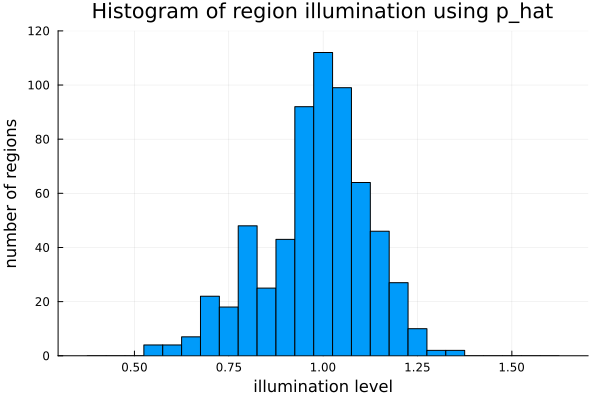

In [99]:
using Plots 
histogram(A*p, bins=(.375:.05:1.625), legend=false, ylim=(0,120), 
            title="Histogram of region illumination using p_hat", 
            ylabel="number of regions",
            xlabel="illumination level")

In [93]:
# intensity if all lamp powers are one 
p2 = ones(n,1)
rms_uniform = rms(A*p2 .- l_des)

0.24174131853807876

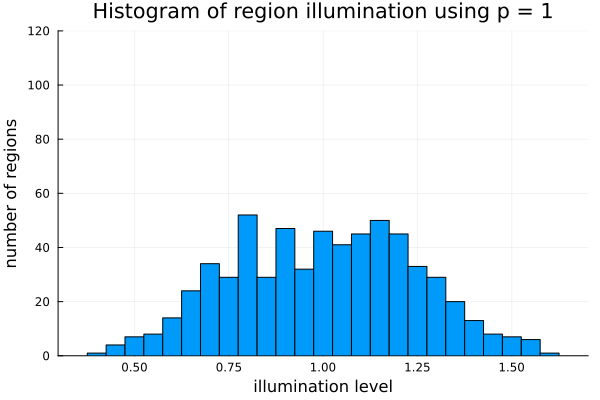

In [101]:
histogram(A*p2, bins=(.375:.05:1.625), legend=false, ylim=(0,120), 
            title="Histogram of region illumination using p = 1", 
            ylabel="number of regions",
            xlabel="illumination level")